In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [58]:
df = pd.read_csv('inflation.csv')

In [59]:
df.head()

,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,1913.0,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0
1,1,1914.0,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1
2,2,1915.0,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3
3,3,1916.0,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6
4,4,1917.0,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7


In [46]:
df.dtypes

Unnamed: 0      int64
Year          float64
Jan           float64
Feb           float64
Mar           float64
Apr           float64
May           float64
Jun           float64
Jul           float64
Aug           float64
Sep           float64
Oct           float64
Nov           float64
Dec           float64
dtype: object

In [60]:
df.isnull().sum() # these nulls are from 2022

Unnamed: 0    0
Year          0
Jan           0
Feb           0
Mar           0
Apr           0
May           1
Jun           1
Jul           1
Aug           1
Sep           1
Oct           1
Nov           1
Dec           1
dtype: int64

In [51]:
data = pd.melt(df, id_vars='Year', value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).rename(columns={'variable':'month', "value": 'num'})

In [54]:
data = data.replace({'Jan' : 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})

In [56]:
data = data.sort_values(['Year', 'month'])

In [57]:
data

,Year,month,num
0,1913.0,1,9.8
110,1913.0,2,9.8
220,1913.0,3,9.8
330,1913.0,4,9.8
440,1913.0,5,9.7
...,...,...,...
879,2022.0,8,NaN
989,2022.0,9,NaN
1099,2022.0,10,NaN
1209,2022.0,11,NaN


Text(0.5, 1.0, 'CPI Inflation from 1913 to 2022')

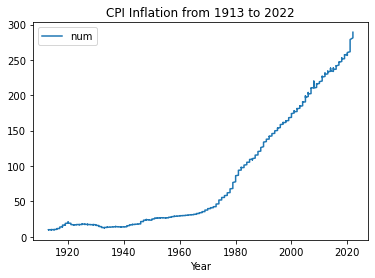

In [66]:
data.plot(x='Year', y='num')
plt.title('CPI Inflation from 1913 to 2022')

,Year,num
0,1913.0,9.883333
1,1914.0,10.016667
2,1915.0,10.108333
3,1916.0,10.883333
4,1917.0,12.825000
...,...,...
105,2018.0,251.106833
106,2019.0,255.657417
107,2020.0,258.811167
108,2021.0,270.969750


<AxesSubplot:xlabel='Year'>

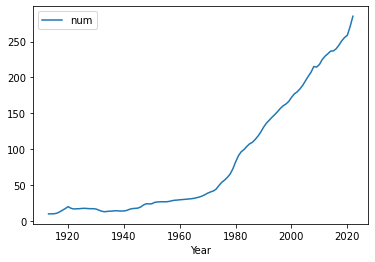

In [76]:
#yearly average
display(data.groupby('Year').mean()['num'].to_frame().reset_index())
data.groupby('Year').mean()['num'].to_frame().reset_index().plot(x='Year', y='num')

,month,num
0,1,83.793200
1,2,84.102327
2,3,84.485900
3,4,84.799836
4,5,83.182339
5,6,83.458789
6,7,83.638954
7,8,83.818119
8,9,84.066394
9,10,84.202312


<AxesSubplot:xlabel='month'>

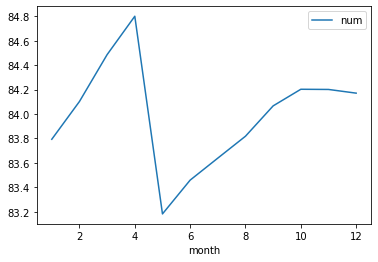

In [80]:
#monthly average
display(data.groupby('month').mean()['num'].to_frame().reset_index())
data.groupby('month').mean()['num'].to_frame().reset_index().plot(x='month', y='num')

##### US's CPI inflation has increased drastically in recent 40 years.
##### If we look at monthly average, April has the highest CPI inflation on average, and May has the lowest CPI inflation (this my due to Nationwide policy)

##### Since we found that CPI inflation drastically increase in the past 40 years, let's dive into the recent 40 years.

In [81]:
data_40 = data[data['Year'] >= 1980]

<AxesSubplot:xlabel='Year', ylabel='num'>

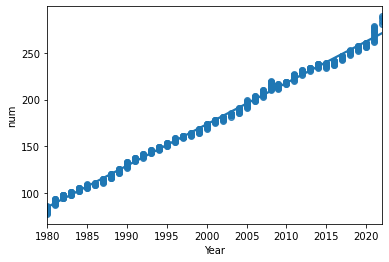

In [88]:
sns.regplot(x='Year', y='num', data=data_40)

## added in a regression line, the trend almost follow the regression line

<AxesSubplot:xlabel='month'>

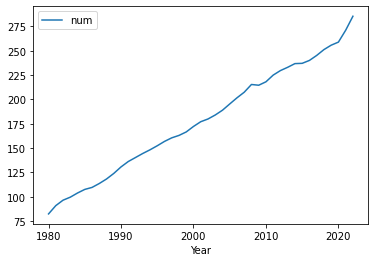

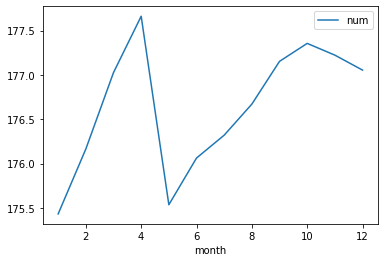

In [90]:
#yearly average
data_40.groupby('Year').mean()['num'].to_frame().reset_index().plot(x='Year', y='num')
#monthly average
data_40.groupby('month').mean()['num'].to_frame().reset_index().plot(x='month', y='num')

In [101]:
data_40['Year'] = data_40['Year'].astype(int).astype('str')
data_40['month'] = data_40['month'].astype('str')
data_40['year_month'] = data_40[['Year', 'month']].agg('-'.join, axis=1)

<ipython-input-101-b124c3a4d0e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_40['Year'] = data_40['Year'].astype(int).astype('str')
<ipython-input-101-b124c3a4d0e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_40['month'] = data_40['month'].astype('str')
<ipython-input-101-b124c3a4d0e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [102]:
data_40['Year'] = data_40['Year'].astype(int)
data_40['month'] = data_40['month'].astype(int)

<ipython-input-102-f9913265856e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_40['Year'] = data_40['Year'].astype(int)
<ipython-input-102-f9913265856e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_40['month'] = data_40['month'].astype(int)


In [103]:
data_40

,Year,month,num,year_month
67,1980,1,77.8,1980-1
177,1980,2,78.9,1980-2
287,1980,3,80.1,1980-3
397,1980,4,81.0,1980-4
507,1980,5,81.8,1980-5
...,...,...,...,...
879,2022,8,NaN,2022-8
989,2022,9,NaN,2022-9
1099,2022,10,NaN,2022-10
1209,2022,11,NaN,2022-11


# find out the regression line

In [110]:
data_40 = data_40.dropna(inplace=True)

<ipython-input-110-9b8b6c1557c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_40 = data_40.dropna(inplace=True)


In [112]:
data_40

In [113]:
X = data_40["Year"]
y = data_40["num"]
model = sm.OLS(y, X).fit()

TypeError: 'NoneType' object is not subscriptable

In [109]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    num   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                         nan
Time:                        13:22:43   Log-Likelihood:                             nan
No. Observations:                 516   AIC:                                        nan
Df Residuals:                     515   BIC:                                        nan
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""